In [1]:
import tensorflow as tf

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


2023-05-06 18:23:21.859169: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 18:23:22.176898: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-05-06 18:23:22.180518: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-05-06 18:23:23.571179: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [22]:
data = pd.read_csv("./processed_data.csv")

X = data[['C1E1', 'median', 'mean', 'std']].values
y = data['t_value'].values - 1

scaler = StandardScaler()
X = scaler.fit_transform(X)
# y = scaler.fit_transform(y)

X_train, X_forward, y_train, y_forward = train_test_split(X, y, test_size=0.2)
X_test, X_val, y_test, y_val = train_test_split(X, y, test_size=0.4)


In [27]:
# Define the model architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(32, activation='relu', input_shape=(4,)),
    tf.keras.layers.Dense(8, activation='relu'),
    tf.keras.layers.Dense(7, activation='softmax')
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              # model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, batch_size=16,
                    epochs=100, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}')


Epoch 1/100
280/280 [==============================] - 1s 3ms/step - loss: 1.6183 - accuracy: 0.3357 - val_loss: 1.1916 - val_accuracy: 0.5299
Epoch 2/100
280/280 [==============================] - 1s 2ms/step - loss: 1.0136 - accuracy: 0.6085 - val_loss: 0.9020 - val_accuracy: 0.7040
Epoch 3/100
280/280 [==============================] - 1s 2ms/step - loss: 0.8357 - accuracy: 0.6746 - val_loss: 0.8005 - val_accuracy: 0.7379
Epoch 4/100
280/280 [==============================] - 1s 2ms/step - loss: 0.7557 - accuracy: 0.7150 - val_loss: 0.7368 - val_accuracy: 0.7442
Epoch 5/100
280/280 [==============================] - 1s 2ms/step - loss: 0.6783 - accuracy: 0.7580 - val_loss: 0.6575 - val_accuracy: 0.7817
Epoch 6/100
280/280 [==============================] - 1s 2ms/step - loss: 0.6123 - accuracy: 0.7737 - val_loss: 0.6261 - val_accuracy: 0.8183
Epoch 7/100
280/280 [==============================] - 1s 2ms/step - loss: 0.5739 - accuracy: 0.7806 - val_loss: 0.5674 - val_accuracy: 0.8210

105/105 [==============================] - 0s 1ms/step
Test accuracy: 0.898
              precision    recall  f1-score   support

           0       0.77      0.59      0.67       467
           1       0.69      0.83      0.75       501
           2       0.96      0.97      0.96       470
           3       0.95      0.98      0.97       497
           4       0.96      0.96      0.96       470
           5       0.98      0.99      0.98       498
           6       0.98      0.96      0.97       457

    accuracy                           0.90      3360
   macro avg       0.90      0.90      0.90      3360
weighted avg       0.90      0.90      0.90      3360



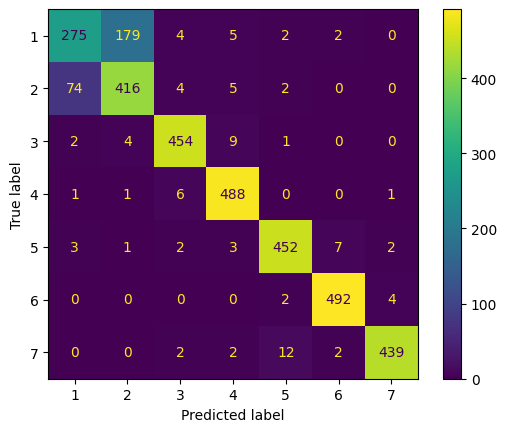

In [33]:
y_pred = np.argmax(model.predict(X_test), axis=-1)

accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.3f}')

report = classification_report(y_test,y_pred)
print(report)

conf_mat = np.array(confusion_matrix(y_test, y_pred))

cm_display = ConfusionMatrixDisplay(
    confusion_matrix=conf_mat, display_labels=[x+1 for x in range(7)])
cm_display.plot()
plt.show()


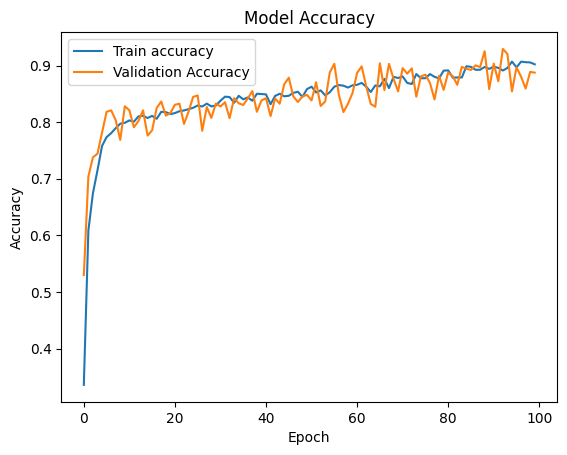

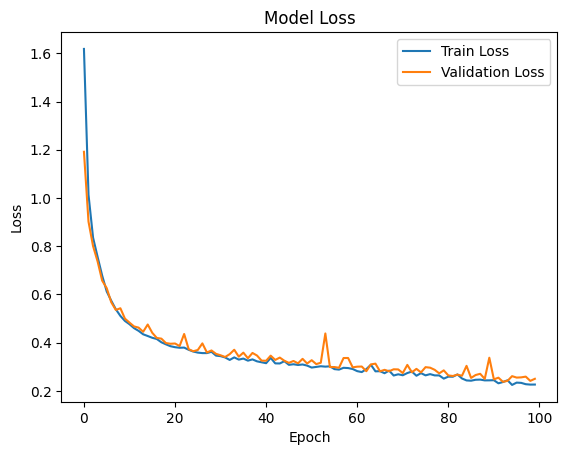

In [29]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train accuracy', 'Validation Accuracy'], loc='best')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train Loss', 'Validation Loss'], loc='best')
plt.show()


In [30]:
model.save("./models/mlp_v3")
model = tf.keras.models.load_model("./models/mlp_v3/")

INFO:tensorflow:Assets written to: ./models/mlp_v3/assets


INFO:tensorflow:Assets written to: ./models/mlp_v3/assets
